<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonprogramming.net/autoencoders-tutorial/

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from tensorflow.keras.layers import Dense, Flatten, Reshape 
from tensorflow.keras import Sequential, Model

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train / 255.
x_test = x_test / 255. 

In [30]:
x_train.shape, x_test[0].shape

((60000, 28, 28), (28, 28))

In [5]:
# defining encoder 
e_input = Input((28,28,1), name='encoder_img')
x = Flatten()(e_input)
e_output = Dense(64, activation='relu')(x)
encoder = Model(e_input, e_output, name="Encoder")
encoder.summary() 

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_img (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [31]:
# defininig decoder and connecting it to encoder (encoder-decoder)
x = Dense(784, activation='relu')(e_output)
d_output = Reshape((28,28,1))(x)

autoencoder = Model(e_input, d_output, name="Decoder")
autoencoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_img (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0167 - accuracy: 0.8147
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - accuracy: 0.8146
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - accuracy: 0.8145


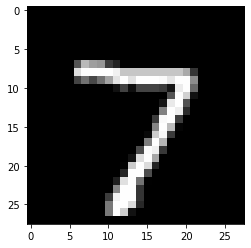

In [34]:
plt.imshow(x_test[0], cmap='gray')

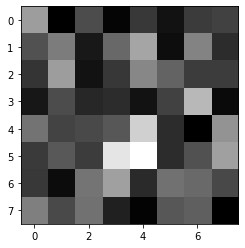

In [35]:
# encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
pred = encoder.predict([x_test[0].reshape(-1,28,28,1)])
plt.imshow(pred.reshape(8,8), cmap='gray')

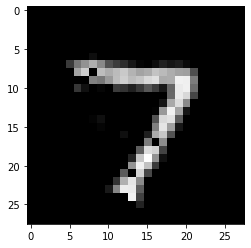

In [36]:
pred_ = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])
plt.imshow(pred_[0].reshape(28,28), cmap='gray')

In [70]:
from skimage.measure import compare_ssim
score,_ = compare_ssim(x_test[0], pred_.reshape(28,28), full=True)
print(score)

0.8896908484437483


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


Adding convolutions and pooling layer in it

In [46]:
# defining encoder 
e_input = Input((28,28,1), name='encoder_img')
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(e_input)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
e_output = Dense(64, activation='relu')(x)
encoder = Model(e_input, e_output, name="Encoder")

# defininig decoder and connecting it to encoder (encoder-decoder)
x = Dense(64, activation='relu')(e_output)
x = Dense(784, activation='relu')(x)
x = Reshape((28,28,1))(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
d_output = tf.keras.layers.Conv2DTranspose(1, 2, padding='same', activation='sigmoid')(x)
autoencoder = Model(e_input, d_output, name="autoencoder")
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=3)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_img (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 16)        1040      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                

In [52]:
## adding some more layers 
# defining encoder 
e_input = Input((28,28,1), name='encoder_img')
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(e_input)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
e_output = Dense(64, activation='relu')(x)
encoder = Model(e_input, e_output, name="Encoder")

# defininig decoder and connecting it to encoder (encoder-decoder)
x = Dense(64, activation='relu')(e_output)
x = Dense(784, activation='relu')(x)
x = Reshape((28,28,1))(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, 2, padding='same', activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
d_output = tf.keras.layers.Conv2DTranspose(1, 2, padding='same', activation='sigmoid')(x)
autoencoder = Model(e_input, d_output, name="autoencoder")
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=3)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_img (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 16)        1040      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                

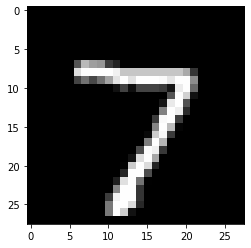

In [55]:
img_t = plt.imshow(x_test[0], cmap='gray')

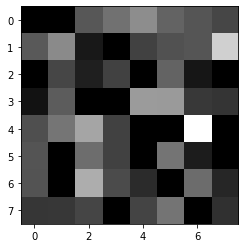

In [53]:
img = encoder.predict(x_test[0].reshape(-1,28,28,1))
plt.imshow(img.reshape(8,8), cmap='gray')

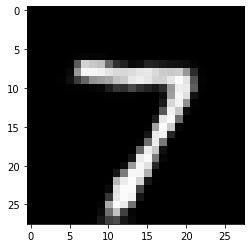

In [54]:
img_ = autoencoder.predict(x_test[0].reshape(-1,28,28,1))
plt.imshow(img_.reshape(28,28), cmap='gray')

In [68]:
x_test[0].shape, img_.reshape(28,28).shape

((28, 28), (28, 28))

In [69]:
score,_ = compare_ssim(x_test[0], img_.reshape(28,28), full=True)
print(score)

0.9571659661976338


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


### It's obvious that conv will perform better and extract much info. as score has difference in scores `89` and `95`